In [1]:
from classy import *

Version:  0.0.14


## Iris

In [2]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [3]:
C=Perceptron()

In [4]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.00177502632141 seconds 


In [5]:
print "On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)
print "On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)

On Training Set: 90.8333333333
On Test Set: 80.0


In [6]:
C=BackProp2(n_hidden=4)

In [7]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.0062210559845 seconds 


/Users/bblais/anaconda/lib/python2.7/site-packages/classy/mlp.py:70: UserWarning: Discarding some samples:                 sample size not divisible by chunk size.
  sample size not divisible by chunk size.")


In [8]:
data_train.vectors.shape,data_train.targets.shape

((120, 4), (120,))

In [9]:
print "On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)
print "On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)

On Training Set: 67.5
On Test Set: 63.3333333333


## XOR Problem - Perceptron

In [10]:
data=load_csv('data/xor.csv')
print 
print data.vectors
print 
print data.targets

4 vectors of length 2
Feature names: 'p1', 'p2'
Target values given.
Target names: '0', '1'
Mean:  [ 0.5  0.5]
Median:  [ 0.5  0.5]
Stddev:  [ 0.5  0.5]

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [11]:
C=Perceptron()

In [12]:
C.fit(data.vectors,data.targets)

In [13]:
print C.predict(data.vectors)

[0 0 0 0]


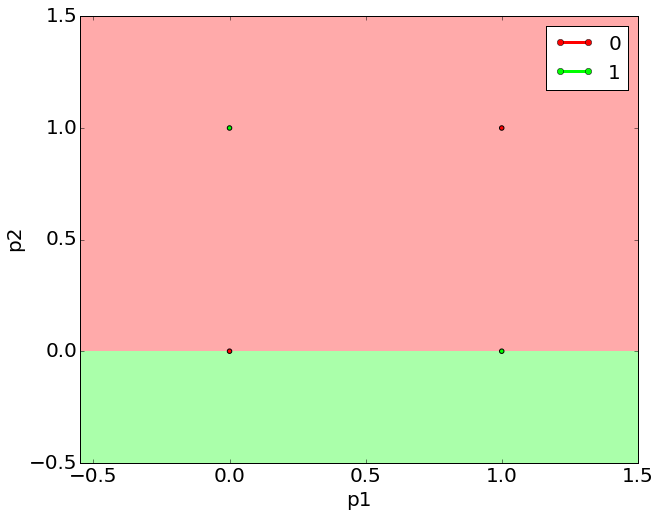

In [14]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

## XOR Problem - Backprop

In [15]:
data.vectors

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  1.]])

In [16]:
data.targets

array([0, 1, 1, 0])

In [17]:
C=BackProp(n_hidden=3)

In [18]:
C.fit(data.vectors,data.targets)

/Users/bblais/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: tuple index out of range

In [ ]:
print C.predict(data.vectors)

In [ ]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

In [ ]:
print data.vectors
print
print data.targets

In [ ]:
h,y=C.output(data.vectors)
print h
print 
print np.round(h)
print
print y

In [ ]:
C.weights_xh

In [ ]:
C.weights_hy

## 8x8

In [ ]:
vectors=eye(8)
targets=arange(1,9)
print vectors,targets

In [ ]:
C=BackProp(n_hidden=3,tol=1e-9)
C.fit(vectors,targets)
print C.predict(vectors)

In [ ]:
h,y=C.output(vectors)

In [ ]:
h

In [ ]:
y

In [ ]:
y.shape

In [ ]:
imshow(h,interpolation='nearest')
colorbar()

In [ ]:
C.weights_xh

In [ ]:
C.weights_hy.T

In [ ]:
plot(C.weights_xh,'-o')

In [ ]:
plot(C.weights_hy,'-o')

## Tuning the number of hidden units

In [ ]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

select which number of hidden units to use

In [ ]:
hidden=[2,4,6,8,10,20,40]
percent_correct=[]
for n in hidden:
    C=BackProp(n_hidden=n)
    C.fit(data_train.vectors,data_train.targets)
    percent_correct.append(C.percent_correct(data_test.vectors,data_test.targets))
    
plot(hidden,percent_correct,'-o')
xlabel('Number of Hidden Units')
ylabel('Percent Correct on Test Data')

this does exactly the same thing, but does every number from 1 to 100, skipping every 2 (1,3,5,7,....,99]

In [ ]:
hidden=arange(1,100,2)
percent_correct=[]
for n in hidden:
    C=BackProp(n_hidden=n)
    C.fit(data_train.vectors,data_train.targets)
    percent_correct.append(C.percent_correct(data_test.vectors,data_test.targets))
    
plot(hidden,percent_correct,'-o')
xlabel('Number of Hidden Units')
ylabel('Percent Correct on Test Data')